# REDES NEURONALES

---



En esta actividad vamos a utilizar una red neuronal para clasificar imágenes de dígitos del 0 al 9 escritos a mano. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es MNIST, una base de datos constituida por (como no) imágenes de dígitos escritos a mano. Este dataset es ampliamente utilizado en docencia como punto de entrada al entrenamiento de redes neuronales y otros, pero también es muy utilizado en trabajos reales de investigación para el entrenamiento de imágenes. Puedes consultar más información sobre el dataset en [este enlace](https://es.wikipedia.org/wiki/Base_de_datos_MNIST).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas celdas si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados y que son perfectamente visibles en la versión PDF que debes entregar adjunta**. Por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch.

In [1]:
#!pip install keras
#!pip install tensorflow
#!pip install matplotlib

In [2]:
from keras.datasets.mnist import load_data
import tensorflow as tf
import matplotlib.pyplot as plt

Tenemos la suerte de que el dataset MNIST, el que vamos a utilizar en esta actividad, está guardado en Keras, por lo que podemos utilizarlo sin necesidad de buscar el dataset de forma externa.

In [3]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen los dígitos y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [4]:
(training_images, training_labels), (test_images, test_labels) = load_data()

Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0 

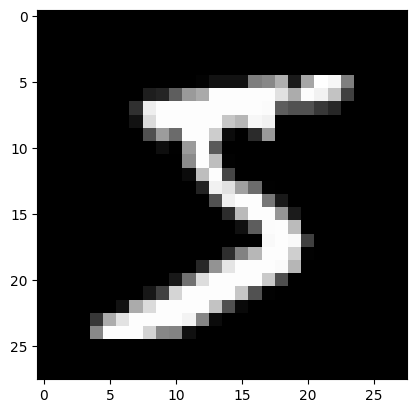

In [5]:
import numpy as np
np.set_printoptions(linewidth=200)
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#
print(training_labels[0])
print(training_images[0])

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.25 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [6]:
# Voy a cambiar las variables por nomeclatura

(x_train, y_train), (x_test, y_test) = (training_images, training_labels), (test_images, test_labels)
# Mostrar información del conjunto
print("Dimensión del dataset de entrenamiento:", x_train.shape)
print("Dimensión del dataset de prueba:", x_test.shape)



Dimensión del dataset de entrenamiento: (60000, 28, 28)
Dimensión del dataset de prueba: (10000, 28, 28)


El número de imágenes de entrenamiento es de 60000 y el número de imágenes de prueba es de 10000. La dimensión de las imágenes es de 28x28 px.

**Pregunta 1.2 *(0.25 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

In [7]:
# Ver tipos de datos
print("Tipo de x_train:", x_train.dtype)
print("Tipo de y_train:", y_train.dtype)

# Valores únicos en las etiquetas
print("Etiquetas únicas:", np.unique(y_train))

Tipo de x_train: uint8
Tipo de y_train: uint8
Etiquetas únicas: [0 1 2 3 4 5 6 7 8 9]


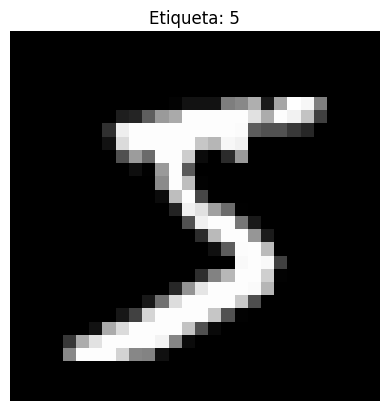

In [8]:
# Visualizar alguna imágenes con sus etiquetas
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Etiqueta: {y_train[0]}")
plt.axis('off')
plt.show()

La variable x_train contiene imágenes en escala de grises de tamaño 28x28 píxeles, cada una representada como una matriz de valores entre 0 y 255 (intensidad de gris). Cada elemento en x_train es una imagen de un dígito escrito a mano.

Por ejemplo, x_train[0] es una matriz de 28x28 que representa la intensidad de cada píxel de la primera imagen del conjunto de entrenamiento.

La variable y_train contiene las etiquetas correspondientes a cada imagen. Es un vector de enteros del 0 al 9, donde cada número indica el dígito que aparece en la imagen correspondiente. Por ejemplo, si y_train[0] = 5, significa que la imagen x_train[0] representa un 5 escrito a mano.

## 2. Normalización y preprocesado de los datos

**Pregunta 2.1 (0.25 puntos)** Habreis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. ¿Cómo lo podemos hacer?

In [9]:
from tensorflow.keras.utils import to_categorical

# Normalización: escalar los píxeles al rango [0, 1].
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


Es conveniente escalar las entradas al rango [0,1] porque mejora la eficiencia y estabilidad del proceso de entrenamiento de la red neuronal. La normalización reduce la varianza de los datos y evita que los valores de entrada grandes dominen los gradientes durante el entrenamiento, lo que podría ralentizar o incluso impedir la convergencia.

Además, muchas funciones de activación como sigmoid o tanh son sensibles a la escala de los datos. Si las entradas no están normalizadas, estas funciones pueden saturarse (producir gradientes cercanos a cero), lo que complica el aprendizaje.

**Pregunta 2.2 (0.25 puntos)** Utiliza la función ***reshape*** de Numpy para convertir las imágenes en vectores de características de un tamaño de (N, 784). Explica con tus palabras por qué es necesario hacer esto.



In [10]:
# Reestructuración: aplanar las imágenes 28x28 a vectores de 784 elementos
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)


**Respuesta a la pregunta 2.2**:

Buscando información, resulta que el reshape es necesario porque las redes neuronales densas requieren vectores como entrada, no matrices. Las imágenes originales de 28x28 píxeles deben aplanarse en vectores de 784 elementos para que puedan ser procesadas por las capas densas de la red. Esta transformación mantiene toda la información de los píxeles, pero cambia su forma para que sea compatible con la arquitectura del modelo.

El uso de -1 en reshape(-1, 784) no es obligatorio, pero es muy conveniente. Permite a la función calcular automáticamente la cantidad de ejemplos en el conjunto de datos. Esto hace el código más general y evita errores si cambia el tamaño del conjunto (como al usar diferentes particiones o subconjuntos). Es una práctica recomendada para mantener el código más limpio y flexible.

**Pregunta 2.3 (0.25 puntos)** Para facilitar el desarrollo de la actividad, vamos a expresar las etiquetas así:

In [11]:
training_labels = tf.keras.utils.to_categorical(training_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

Muestra cómo son ahora los datos, como resultado de este cambio y también de los realizados en las dos preguntas anteriores. Debate cómo se beneficiará la red neuronal de todos estos cambios.

In [12]:

# Ejemplo antes de la codificación
print("Etiqueta original:", y_train[0])  # numérica

# Codificación one-hot (ya hecho antes, repetimos para claridad)
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Ejemplo después de la codificación
print("Etiqueta codificada (one-hot):", y_train_encoded[0])

# Mostrar la forma de los datos
print("Forma de y_train después del one-hot encoding:", y_train_encoded.shape)


Etiqueta original: 5
Etiqueta codificada (one-hot): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Forma de y_train después del one-hot encoding: (60000, 10)


**Respuesta a la pregunta 2.3:**

Tras aplicar to_categorical, las etiquetas han pasado de ser valores enteros entre 0 y 9 (por ejemplo, 5) a vectores binarios de 10 posiciones (por ejemplo, [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]).

Este cambio es importante porque facilita el uso de la función de pérdida categorical_crossentropy, que espera que las clases estén en formato one-hot. Así, la red neuronal no predice un número directamente, sino una probabilidad para cada una de las 10 clases posibles.

Además, esto permite que la red:

- Aprenda de manera más robusta al separar las clases de forma explícita.

- Genere una distribución de probabilidades sobre todas las clases.

- Sea más flexible en problemas de clasificación multiclase.

## 3. Creación del Modelo

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy útiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas cómo eran las imágenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa (en problemas de clasificación de más de dos items)
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 3.1 (0.5 puntos)**. Utilizando Keras, y preparando los datos de X e Y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de MNIST con las siguientes características:

* Una capa de entrada del tamaño adecuado.
* Una capa oculta de 512 neuronas.
* Una capa final con 10 salidas.

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Crear el modelo
model = Sequential()

# Capa oculta con 128 neuronas y activación ReLU
model.add(Dense(units=128, activation='relu', input_shape=(784,)))

# Capa de salida con 10 neuronas (una por cada dígito), activación softmax
model.add(Dense(units=10, activation='softmax'))



C:\Users\Pedro\anaconda3\envs\rn_act1\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Pregunta 3.2 (0.25 puntos)**: ¿crees conveniente utilizar una capa flatten en este caso? Motiva tu respuesta.



No es necesario utilizar flatten pues ya hemos hecho la transformación de las matrices 28x28 a vectores de 784 elementos

**Respuesta a la pregunta 3.2**:

**Pregunta 3.3 (0.25 puntos)**: Utiliza la función summary() para mostrar la estructura de tu modelo.

In [14]:

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## 4: Compilación y entrenamiento

**Pregunta 4.1 (0.5 puntos)**: Compila tu modelo. Utiliza ***categorical_crossentropy*** como función de pérdida, ***Adam*** como optimizador, y monitoriza la ***tasa de acierto*** durante el entrenamiento. Explica qué hace cada cosa en la compilación.

In [15]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

**Respuesta a la pregunta 4.1**:

El modelo se compila usando el optimizador Adam, que es eficiente en muchos problemas de clasificación. Se utiliza categorical_crossentropy como función de pérdida ya que se trabaja con etiquetas codificadas en one-hot. Durante el entrenamiento, se mide la precisión (accuracy) y se evalúa el modelo también sobre un conjunto de validación para observar si mejora o sufre sobreajuste.

**Pregunta 4.2 (0.5 puntos)**: Utiliza la función ***fit()*** para entrenar tu modelo. Para ayudarte en tu primer entrenamiento, utiliza estos valores:
*   epochs = 5
*   batch_size = 32
*   validation_split = 0.25



In [16]:
history = model.fit(x_train, y_train_encoded,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=2)


Epoch 1/10
1500/1500 - 4s - 3ms/step - accuracy: 0.9175 - loss: 0.2880 - val_accuracy: 0.9556 - val_loss: 0.1602
Epoch 2/10
1500/1500 - 4s - 2ms/step - accuracy: 0.9631 - loss: 0.1260 - val_accuracy: 0.9688 - val_loss: 0.1072
Epoch 3/10
1500/1500 - 4s - 3ms/step - accuracy: 0.9742 - loss: 0.0865 - val_accuracy: 0.9722 - val_loss: 0.0960
Epoch 4/10
1500/1500 - 4s - 2ms/step - accuracy: 0.9800 - loss: 0.0651 - val_accuracy: 0.9725 - val_loss: 0.0914
Epoch 5/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9843 - loss: 0.0509 - val_accuracy: 0.9730 - val_loss: 0.0935
Epoch 6/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9880 - loss: 0.0395 - val_accuracy: 0.9743 - val_loss: 0.0856
Epoch 7/10
1500/1500 - 4s - 2ms/step - accuracy: 0.9904 - loss: 0.0312 - val_accuracy: 0.9745 - val_loss: 0.0967
Epoch 8/10
1500/1500 - 4s - 3ms/step - accuracy: 0.9926 - loss: 0.0240 - val_accuracy: 0.9757 - val_loss: 0.0941
Epoch 9/10
1500/1500 - 4s - 3ms/step - accuracy: 0.9939 - loss: 0.0203 - val_accuracy: 0.9759 - 

Con verbose = 2, se muestran las métricas como accuracy o la función de pérdida de forma resumida por epoch

# 5: Impacto al variar el número de neuronas en las capas ocultas

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por otros valores. Para ello, utiliza la red neuronal de la pregunta 3, y su capa oculta cambia el número de neuronas:

* **216 neuronas en la capa oculta
* **1024 neuronas en la capa oculta

y entrena la red en ambos casos.



In [17]:
model_216 = Sequential()
model_216.add(Dense(216, activation='relu', input_shape=(784,)))
model_216.add(Dense(10, activation='softmax'))



In [18]:
model_216.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])



In [19]:
history_216 = model_216.fit(x_train, y_train_encoded,
                            epochs=10,
                            batch_size=32,
                            validation_split=0.2,
                            verbose=2)

Epoch 1/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9274 - loss: 0.2536 - val_accuracy: 0.9622 - val_loss: 0.1349
Epoch 2/10
1500/1500 - 4s - 3ms/step - accuracy: 0.9686 - loss: 0.1058 - val_accuracy: 0.9695 - val_loss: 0.1049
Epoch 3/10
1500/1500 - 4s - 2ms/step - accuracy: 0.9778 - loss: 0.0722 - val_accuracy: 0.9707 - val_loss: 0.0904
Epoch 4/10
1500/1500 - 4s - 3ms/step - accuracy: 0.9850 - loss: 0.0506 - val_accuracy: 0.9723 - val_loss: 0.0906
Epoch 5/10
1500/1500 - 4s - 3ms/step - accuracy: 0.9889 - loss: 0.0363 - val_accuracy: 0.9724 - val_loss: 0.0968
Epoch 6/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9911 - loss: 0.0282 - val_accuracy: 0.9742 - val_loss: 0.0883
Epoch 7/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9933 - loss: 0.0215 - val_accuracy: 0.9774 - val_loss: 0.0827
Epoch 8/10
1500/1500 - 4s - 3ms/step - accuracy: 0.9946 - loss: 0.0174 - val_accuracy: 0.9772 - val_loss: 0.0901
Epoch 9/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9952 - loss: 0.0151 - val_accuracy: 0.9766 - 

In [20]:
model_1024 = Sequential()
model_1024.add(Dense(1024, activation='relu', input_shape=(784,)))
model_1024.add(Dense(10, activation='softmax'))



In [21]:
model_1024.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])



In [22]:
history_1024 = model_1024.fit(x_train, y_train_encoded,
                            epochs=10,
                            batch_size=32,
                            validation_split=0.2,
                            verbose=2)

Epoch 1/10
1500/1500 - 14s - 9ms/step - accuracy: 0.9387 - loss: 0.2038 - val_accuracy: 0.9628 - val_loss: 0.1218
Epoch 2/10
1500/1500 - 13s - 8ms/step - accuracy: 0.9742 - loss: 0.0799 - val_accuracy: 0.9688 - val_loss: 0.0980
Epoch 3/10
1500/1500 - 13s - 9ms/step - accuracy: 0.9837 - loss: 0.0523 - val_accuracy: 0.9735 - val_loss: 0.0934
Epoch 4/10
1500/1500 - 12s - 8ms/step - accuracy: 0.9885 - loss: 0.0364 - val_accuracy: 0.9759 - val_loss: 0.0838
Epoch 5/10
1500/1500 - 12s - 8ms/step - accuracy: 0.9912 - loss: 0.0261 - val_accuracy: 0.9779 - val_loss: 0.0860
Epoch 6/10
1500/1500 - 12s - 8ms/step - accuracy: 0.9931 - loss: 0.0207 - val_accuracy: 0.9795 - val_loss: 0.0814
Epoch 7/10
1500/1500 - 12s - 8ms/step - accuracy: 0.9934 - loss: 0.0189 - val_accuracy: 0.9781 - val_loss: 0.0897
Epoch 8/10
1500/1500 - 13s - 8ms/step - accuracy: 0.9954 - loss: 0.0143 - val_accuracy: 0.9775 - val_loss: 0.1102
Epoch 9/10
1500/1500 - 12s - 8ms/step - accuracy: 0.9950 - loss: 0.0138 - val_accuracy: 

**Pregunta 5.1 (0.5 puntos)**: ¿Cual es el impacto que tiene la red neuronal?

Respuesta a la pregunta 5.1:

Al comparar los dos modelos, se observa que el modelo con 1024 neuronas alcanza una mayor precisión en entrenamiento mientras que en la validación ha resultado al contrario. Sin embargo, también se tarda más en entrenar la de 1024 y tiene un mayor riesgo de sobreajuste, mientras que la de 128 ha tardado menos en entrenarse.

# 6: Número de neuronas de la capa de salida
Considerad la capa final, la de salida de la red neuronal de la pregunta 3.

**Pregunta 6.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**Pregunta 6.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10?

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [23]:
# Crear un modelo incorrecto con solo 5 neuronas en la capa de salida
model_inc = Sequential()
model_inc.add(Dense(128, activation='relu', input_shape=(784,)))
model_inc.add(Dense(5, activation='softmax')) 





In [24]:
model_inc.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [25]:
# Intentar entrenar (esto debería dar error o funcionar mal)
history_inc = model_inc.fit(x_train, y_train,
                                epochs=10,
                                batch_size=32,
                                validation_split=0.2,
                                verbose=2)

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(32,), output.shape=(32, 5)

Tu respuestas a la pregunta 6.1 aquí:

Porque son el número de clases que se pretende predecir

Tu respuestas a la pregunta 6.2 aquí:

En la prueba, configuramos la capa de salida con solo 5 neuronas cuando el dataset requiere de 10 clases. Al compilar y entrenar el modelo, se produce un error porque la forma de las etiquetas (10 dimensiones por one-hot encoding) no coincide con la salida del modelo (5 neuronas).

# 7: Aumento de epoch y su efecto en la red neuronal
En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 3:

**Pregunta 7.1 (0.25 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**Pregunta 7.2 (0.25 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento.

**Pregunta 7.3 (0.25 puntos)**
* ¿Qué está pasando en la pregunta anterior? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [26]:
# Crear el modelo
model2 = Sequential()

# Capa oculta con 128 neuronas y activación ReLU
model2.add(Dense(units=128, activation='relu', input_shape=(784,)))

# Capa de salida con 10 neuronas (una por cada dígito), activación softmax
model2.add(Dense(units=10, activation='softmax'))

In [27]:
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
history_15 = model2.fit(x_train, y_train_encoded,
                          epochs=15,
                          batch_size=32,
                          validation_split=0.2,
                          verbose=2)

Epoch 1/15
1500/1500 - 4s - 3ms/step - accuracy: 0.9166 - loss: 0.2938 - val_accuracy: 0.9443 - val_loss: 0.1799
Epoch 2/15
1500/1500 - 3s - 2ms/step - accuracy: 0.9626 - loss: 0.1312 - val_accuracy: 0.9656 - val_loss: 0.1173
Epoch 3/15
1500/1500 - 3s - 2ms/step - accuracy: 0.9740 - loss: 0.0887 - val_accuracy: 0.9625 - val_loss: 0.1222
Epoch 4/15
1500/1500 - 4s - 3ms/step - accuracy: 0.9803 - loss: 0.0666 - val_accuracy: 0.9701 - val_loss: 0.0975
Epoch 5/15
1500/1500 - 4s - 2ms/step - accuracy: 0.9844 - loss: 0.0516 - val_accuracy: 0.9738 - val_loss: 0.0901
Epoch 6/15
1500/1500 - 4s - 3ms/step - accuracy: 0.9882 - loss: 0.0398 - val_accuracy: 0.9744 - val_loss: 0.0904
Epoch 7/15
1500/1500 - 3s - 2ms/step - accuracy: 0.9905 - loss: 0.0312 - val_accuracy: 0.9752 - val_loss: 0.0883
Epoch 8/15
1500/1500 - 3s - 2ms/step - accuracy: 0.9914 - loss: 0.0269 - val_accuracy: 0.9755 - val_loss: 0.0917
Epoch 9/15
1500/1500 - 3s - 2ms/step - accuracy: 0.9936 - loss: 0.0217 - val_accuracy: 0.9772 - 

In [31]:
# Crear el modelo
model3 = Sequential()

# Capa oculta con 128 neuronas y activación ReLU
model3.add(Dense(units=128, activation='relu', input_shape=(784,)))

# Capa de salida con 10 neuronas (una por cada dígito), activación softmax
model3.add(Dense(units=10, activation='softmax'))

In [32]:
model3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [34]:
history_30 = model3.fit(x_train, y_train_encoded,
                          epochs=30,
                          batch_size=32,
                          validation_split=0.2,
                          verbose=2)

Epoch 1/30
1500/1500 - 4s - 3ms/step - accuracy: 0.9190 - loss: 0.2834 - val_accuracy: 0.9526 - val_loss: 0.1660
Epoch 2/30
1500/1500 - 4s - 2ms/step - accuracy: 0.9623 - loss: 0.1285 - val_accuracy: 0.9636 - val_loss: 0.1249
Epoch 3/30
1500/1500 - 4s - 3ms/step - accuracy: 0.9731 - loss: 0.0890 - val_accuracy: 0.9677 - val_loss: 0.1047
Epoch 4/30
1500/1500 - 3s - 2ms/step - accuracy: 0.9811 - loss: 0.0652 - val_accuracy: 0.9722 - val_loss: 0.0970
Epoch 5/30
1500/1500 - 3s - 2ms/step - accuracy: 0.9843 - loss: 0.0519 - val_accuracy: 0.9743 - val_loss: 0.0877
Epoch 6/30
1500/1500 - 3s - 2ms/step - accuracy: 0.9878 - loss: 0.0401 - val_accuracy: 0.9743 - val_loss: 0.0940
Epoch 7/30
1500/1500 - 4s - 3ms/step - accuracy: 0.9909 - loss: 0.0299 - val_accuracy: 0.9722 - val_loss: 0.0982
Epoch 8/30
1500/1500 - 4s - 2ms/step - accuracy: 0.9928 - loss: 0.0240 - val_accuracy: 0.9742 - val_loss: 0.0946
Epoch 9/30
1500/1500 - 3s - 2ms/step - accuracy: 0.9937 - loss: 0.0211 - val_accuracy: 0.9772 - 

Tu respuesta a la pregunta 7.3 aquí:

Al aumentar el número de épocas de entrenamiento, el modelo tiene más oportunidades de ajustarse a los datos. Con 15 épocas, la precisión mejora con respecto a 10, y con 30 puede seguir mejorando inicialmente. Sin embargo, si el modelo empieza a aprender demasiado los datos de entrenamiento y pierde capacidad de generalización, puede aparecer sobreajuste. En ese caso, la precisión en validación se estabiliza o incluso disminuye, mientras la de entrenamiento sigue subiendo.



# 8: Early stop
En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del código de ejemplo, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [35]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True

**Pregunta 8.1. *(0.75 puntos)***: Consulta la documentación de Keras y aprende cómo podemos utilizar Early stop en nuestro modelos.

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

# Definir el callback de EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',     # métrica a vigilar
    patience=3,             # número de épocas sin mejora antes de detener
    restore_best_weights=True  # recupera los mejores pesos
)




In [37]:
# Crear el modelo
model = Sequential()

# Capa oculta con 128 neuronas y activación ReLU
model.add(Dense(units=128, activation='relu', input_shape=(784,)))

# Capa de salida con 10 neuronas (una por cada dígito), activación softmax
model.add(Dense(units=10, activation='softmax'))

In [38]:
model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [39]:
history_early = model.fit(x_train, y_train_encoded,
                          epochs=30,
                          batch_size=32,
                          validation_split=0.2,
                          callbacks=[early_stop],
                          verbose=2)

Epoch 1/30
1500/1500 - 5s - 3ms/step - accuracy: 0.9194 - loss: 0.2836 - val_accuracy: 0.9563 - val_loss: 0.1535
Epoch 2/30
1500/1500 - 4s - 3ms/step - accuracy: 0.9623 - loss: 0.1251 - val_accuracy: 0.9643 - val_loss: 0.1153
Epoch 3/30
1500/1500 - 4s - 2ms/step - accuracy: 0.9742 - loss: 0.0859 - val_accuracy: 0.9674 - val_loss: 0.1093
Epoch 4/30
1500/1500 - 3s - 2ms/step - accuracy: 0.9808 - loss: 0.0629 - val_accuracy: 0.9716 - val_loss: 0.0955
Epoch 5/30
1500/1500 - 3s - 2ms/step - accuracy: 0.9854 - loss: 0.0493 - val_accuracy: 0.9713 - val_loss: 0.0974
Epoch 6/30
1500/1500 - 4s - 2ms/step - accuracy: 0.9881 - loss: 0.0381 - val_accuracy: 0.9728 - val_loss: 0.0936
Epoch 7/30
1500/1500 - 4s - 3ms/step - accuracy: 0.9909 - loss: 0.0304 - val_accuracy: 0.9752 - val_loss: 0.0888
Epoch 8/30
1500/1500 - 3s - 2ms/step - accuracy: 0.9928 - loss: 0.0243 - val_accuracy: 0.9746 - val_loss: 0.0925
Epoch 9/30
1500/1500 - 3s - 2ms/step - accuracy: 0.9940 - loss: 0.0201 - val_accuracy: 0.9771 - 

Keras permite usar el callback EarlyStopping para detener el entrenamiento automáticamente cuando una métrica (por ejemplo, val_loss o val_accuracy) deja de mejorar. Esto ayuda a evitar el sobreentrenamiento y reduce el tiempo de computación. Se puede configurar qué métrica observar (monitor), cuántas épocas esperar antes de detener (patience) y si se deben restaurar los mejores pesos (restore_best_weights=True).

Esto es útil cuando, como en el ejercicio anterior, la precisión ya es suficiente tras pocas épocas, y seguir entrenando no mejora el modelo e incluso lo empeora.

## 9. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Pregunta 9.1 *(0.75 puntos)***: Utilizando la red realizada en el ejercicio 3, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

In [40]:
model_relu = Sequential()
model_relu.add(Dense(128, activation='relu', input_shape=(784,)))
model_relu.add(Dense(64, activation='relu'))
model_relu.add(Dense(32, activation='relu'))
model_relu.add(Dense(10, activation='softmax'))





In [41]:
model_relu.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])


In [42]:
history_relu = model_relu.fit(x_train, y_train_encoded,
                              epochs=15,
                              batch_size=32,
                              validation_split=0.2,
                              verbose=2)

Epoch 1/15
1500/1500 - 5s - 3ms/step - accuracy: 0.9153 - loss: 0.2791 - val_accuracy: 0.9578 - val_loss: 0.1425
Epoch 2/15
1500/1500 - 4s - 2ms/step - accuracy: 0.9642 - loss: 0.1175 - val_accuracy: 0.9662 - val_loss: 0.1077
Epoch 3/15
1500/1500 - 4s - 2ms/step - accuracy: 0.9743 - loss: 0.0836 - val_accuracy: 0.9709 - val_loss: 0.1010
Epoch 4/15
1500/1500 - 3s - 2ms/step - accuracy: 0.9808 - loss: 0.0638 - val_accuracy: 0.9717 - val_loss: 0.0947
Epoch 5/15
1500/1500 - 3s - 2ms/step - accuracy: 0.9841 - loss: 0.0500 - val_accuracy: 0.9722 - val_loss: 0.0999
Epoch 6/15
1500/1500 - 3s - 2ms/step - accuracy: 0.9863 - loss: 0.0418 - val_accuracy: 0.9732 - val_loss: 0.1039
Epoch 7/15
1500/1500 - 4s - 3ms/step - accuracy: 0.9881 - loss: 0.0358 - val_accuracy: 0.9703 - val_loss: 0.1111
Epoch 8/15
1500/1500 - 3s - 2ms/step - accuracy: 0.9899 - loss: 0.0300 - val_accuracy: 0.9729 - val_loss: 0.1058
Epoch 9/15
1500/1500 - 4s - 2ms/step - accuracy: 0.9911 - loss: 0.0271 - val_accuracy: 0.9651 - 

In [44]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(128, activation='sigmoid', input_shape=(784,)))
model_sigmoid.add(Dense(64, activation='sigmoid'))
model_sigmoid.add(Dense(32, activation='sigmoid'))
model_sigmoid.add(Dense(10, activation='softmax'))





In [45]:
model_sigmoid.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

In [46]:
history_sigmoid = model_sigmoid.fit(x_train, y_train_encoded,
                                    epochs=15,
                                    batch_size=32,
                                    validation_split=0.2,
                                    verbose=2)

Epoch 1/15
1500/1500 - 7s - 4ms/step - accuracy: 0.8336 - loss: 0.7202 - val_accuracy: 0.9316 - val_loss: 0.2570
Epoch 2/15
1500/1500 - 4s - 3ms/step - accuracy: 0.9404 - loss: 0.2137 - val_accuracy: 0.9506 - val_loss: 0.1746
Epoch 3/15
1500/1500 - 4s - 2ms/step - accuracy: 0.9583 - loss: 0.1459 - val_accuracy: 0.9602 - val_loss: 0.1402
Epoch 4/15
1500/1500 - 4s - 3ms/step - accuracy: 0.9685 - loss: 0.1099 - val_accuracy: 0.9657 - val_loss: 0.1222
Epoch 5/15
1500/1500 - 5s - 3ms/step - accuracy: 0.9758 - loss: 0.0845 - val_accuracy: 0.9677 - val_loss: 0.1078
Epoch 6/15
1500/1500 - 3s - 2ms/step - accuracy: 0.9806 - loss: 0.0678 - val_accuracy: 0.9688 - val_loss: 0.1078
Epoch 7/15
1500/1500 - 4s - 3ms/step - accuracy: 0.9847 - loss: 0.0533 - val_accuracy: 0.9697 - val_loss: 0.1024
Epoch 8/15
1500/1500 - 4s - 3ms/step - accuracy: 0.9875 - loss: 0.0444 - val_accuracy: 0.9678 - val_loss: 0.1051
Epoch 9/15
1500/1500 - 5s - 3ms/step - accuracy: 0.9897 - loss: 0.0357 - val_accuracy: 0.9710 - 

En la comparación realizada entre las funciones de activación ReLU y Sigmoid, se observa que ambas alcanzan precisiones similares tras 15 épocas, con valores cercanos al 88%. Sin embargo, ReLU muestra una convergencia más rápida, obteniendo altos valores de precisión en menos épocas.

Esto se debe a que ReLU no satura en los extremos y permite flujos de gradiente más estables, mientras que Sigmoid puede sufrir el problema del desvanecimiento del gradiente, especialmente en redes profundas.

## 10. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Pregunta 10.1 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

In [47]:
from tensorflow.keras.initializers import Zeros

model_zeros = Sequential()
model_zeros.add(Dense(128, activation='relu', input_shape=(784,), kernel_initializer=Zeros()))
model_zeros.add(Dense(10, activation='softmax', kernel_initializer=Zeros()))

model_zeros.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

history_zeros = model_zeros.fit(x_train, y_train_encoded,
                                epochs=10,
                                batch_size=32,
                                validation_split=0.2,
                                verbose=2)


Epoch 1/10
1500/1500 - 5s - 3ms/step - accuracy: 0.1139 - loss: 2.3014 - val_accuracy: 0.1060 - val_loss: 2.3020
Epoch 2/10
1500/1500 - 4s - 3ms/step - accuracy: 0.1140 - loss: 2.3012 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 3/10
1500/1500 - 3s - 2ms/step - accuracy: 0.1140 - loss: 2.3012 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 4/10
1500/1500 - 3s - 2ms/step - accuracy: 0.1140 - loss: 2.3011 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 5/10
1500/1500 - 3s - 2ms/step - accuracy: 0.1140 - loss: 2.3012 - val_accuracy: 0.1060 - val_loss: 2.3023
Epoch 6/10
1500/1500 - 4s - 2ms/step - accuracy: 0.1140 - loss: 2.3011 - val_accuracy: 0.1060 - val_loss: 2.3020
Epoch 7/10
1500/1500 - 4s - 2ms/step - accuracy: 0.1140 - loss: 2.3012 - val_accuracy: 0.1060 - val_loss: 2.3019
Epoch 8/10
1500/1500 - 3s - 2ms/step - accuracy: 0.1140 - loss: 2.3011 - val_accuracy: 0.1060 - val_loss: 2.3022
Epoch 9/10
1500/1500 - 3s - 2ms/step - accuracy: 0.1140 - loss: 2.3012 - val_accuracy: 0.1060 - 

In [48]:
from tensorflow.keras.initializers import RandomNormal

model_normal = Sequential()
model_normal.add(Dense(128, activation='relu', input_shape=(784,), kernel_initializer=RandomNormal()))
model_normal.add(Dense(10, activation='softmax', kernel_initializer=RandomNormal()))

model_normal.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

history_normal = model_normal.fit(x_train, y_train_encoded,
                                  epochs=10,
                                  batch_size=32,
                                  validation_split=0.2,
                                  verbose=2)


Epoch 1/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9098 - loss: 0.3192 - val_accuracy: 0.9513 - val_loss: 0.1708
Epoch 2/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9588 - loss: 0.1396 - val_accuracy: 0.9659 - val_loss: 0.1181
Epoch 3/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9722 - loss: 0.0940 - val_accuracy: 0.9700 - val_loss: 0.1026
Epoch 4/10
1500/1500 - 4s - 3ms/step - accuracy: 0.9789 - loss: 0.0696 - val_accuracy: 0.9730 - val_loss: 0.0858
Epoch 5/10
1500/1500 - 4s - 3ms/step - accuracy: 0.9835 - loss: 0.0547 - val_accuracy: 0.9711 - val_loss: 0.0983
Epoch 6/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9877 - loss: 0.0420 - val_accuracy: 0.9722 - val_loss: 0.0947
Epoch 7/10
1500/1500 - 4s - 2ms/step - accuracy: 0.9899 - loss: 0.0338 - val_accuracy: 0.9768 - val_loss: 0.0804
Epoch 8/10
1500/1500 - 4s - 3ms/step - accuracy: 0.9924 - loss: 0.0265 - val_accuracy: 0.9746 - val_loss: 0.0941
Epoch 9/10
1500/1500 - 4s - 3ms/step - accuracy: 0.9942 - loss: 0.0205 - val_accuracy: 0.9768 - 

In [59]:
model_normal = Sequential()
model_normal.add(Dense(128, activation='relu', input_shape=(784,)))
model_normal.add(Dense(10, activation='softmax', kernel_initializer=RandomNormal()))

model_normal.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

history_normal = model_normal.fit(x_train, y_train_encoded,
                                  epochs=10,
                                  batch_size=32,
                                  validation_split=0.2,
                                  verbose=2)


Epoch 1/10
1500/1500 - 4s - 3ms/step - accuracy: 0.9130 - loss: 0.3125 - val_accuracy: 0.9557 - val_loss: 0.1574
Epoch 2/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9613 - loss: 0.1333 - val_accuracy: 0.9672 - val_loss: 0.1131
Epoch 3/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9728 - loss: 0.0921 - val_accuracy: 0.9711 - val_loss: 0.0996
Epoch 4/10
1500/1500 - 4s - 2ms/step - accuracy: 0.9798 - loss: 0.0690 - val_accuracy: 0.9714 - val_loss: 0.0962
Epoch 5/10
1500/1500 - 4s - 3ms/step - accuracy: 0.9839 - loss: 0.0529 - val_accuracy: 0.9728 - val_loss: 0.0880
Epoch 6/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9877 - loss: 0.0416 - val_accuracy: 0.9737 - val_loss: 0.0892
Epoch 7/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9896 - loss: 0.0335 - val_accuracy: 0.9747 - val_loss: 0.0837
Epoch 8/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9921 - loss: 0.0264 - val_accuracy: 0.9755 - val_loss: 0.0879
Epoch 9/10
1500/1500 - 4s - 3ms/step - accuracy: 0.9938 - loss: 0.0207 - val_accuracy: 0.9772 - 

La inicialización de pesos es un aspecto fundamental en redes neuronales profundas, ya que condiciona directamente la calidad del entrenamiento y la estabilidad de la propagación del gradiente. En este experimento, hemos comparado tres esquemas de inicialización en una red multicapa con activaciones ReLU:

Inicialización con ceros: esta estrategia impide el aprendizaje efectivo, ya que todos los nodos comienzan con pesos idénticos. Como consecuencia, todas las neuronas aprenden las mismas características (falta de ruptura de simetría), y el gradiente que reciben es el mismo. La red no converge.

Inicialización aleatoria normal: si bien introduce la ruptura de simetría, puede generar problemas si los valores iniciales están mal escalados, especialmente en redes profundas con ReLU, donde la activación puede "apagarse" (output = 0) para muchas neuronas. En nuestro caso, el entrenamiento funciona, pero con oscilaciones mayores.

Inicialización glorot_uniform (por defecto en Keras): esta técnica balancea la varianza de los pesos considerando el número de entradas y salidas de cada capa. Permite una propagación estable del gradiente y una convergencia más rápida, especialmente adecuada para activaciones ReLU y redes densas.

## 11. Optimizadores

**Problema 11.1 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de RMSprop es buena idea dejar los valores por defecto provistos por Keras).

In [50]:
from tensorflow.keras.optimizers import SGD

model_sgd = Sequential()
model_sgd.add(Dense(128, activation='relu', input_shape=(784,)))
model_sgd.add(Dense(10, activation='softmax'))



In [51]:
model_sgd.compile(optimizer=SGD(learning_rate=0.01),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])



In [52]:
history_sgd = model_sgd.fit(x_train, y_train_encoded,
                            epochs=15,
                            batch_size=32,
                            validation_split=0.2,
                            verbose=2)


Epoch 1/15
1500/1500 - 4s - 2ms/step - accuracy: 0.8305 - loss: 0.6923 - val_accuracy: 0.8983 - val_loss: 0.3744
Epoch 2/15
1500/1500 - 4s - 2ms/step - accuracy: 0.9001 - loss: 0.3596 - val_accuracy: 0.9149 - val_loss: 0.3084
Epoch 3/15
1500/1500 - 3s - 2ms/step - accuracy: 0.9126 - loss: 0.3101 - val_accuracy: 0.9212 - val_loss: 0.2772
Epoch 4/15
1500/1500 - 3s - 2ms/step - accuracy: 0.9217 - loss: 0.2796 - val_accuracy: 0.9283 - val_loss: 0.2544
Epoch 5/15
1500/1500 - 3s - 2ms/step - accuracy: 0.9277 - loss: 0.2571 - val_accuracy: 0.9327 - val_loss: 0.2364
Epoch 6/15
1500/1500 - 4s - 3ms/step - accuracy: 0.9330 - loss: 0.2385 - val_accuracy: 0.9358 - val_loss: 0.2222
Epoch 7/15
1500/1500 - 3s - 2ms/step - accuracy: 0.9371 - loss: 0.2229 - val_accuracy: 0.9410 - val_loss: 0.2109
Epoch 8/15
1500/1500 - 3s - 2ms/step - accuracy: 0.9405 - loss: 0.2095 - val_accuracy: 0.9439 - val_loss: 0.2004
Epoch 9/15
1500/1500 - 3s - 2ms/step - accuracy: 0.9443 - loss: 0.1976 - val_accuracy: 0.9476 - 

In [53]:
from tensorflow.keras.optimizers import RMSprop

model_rmsprop = Sequential()
model_rmsprop.add(Dense(128, activation='relu', input_shape=(784,)))
model_rmsprop.add(Dense(10, activation='softmax'))



In [54]:
model_rmsprop.compile(optimizer=RMSprop(),  
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])



In [55]:
history_rmsprop = model_rmsprop.fit(x_train, y_train_encoded,
                                    epochs=15,
                                    batch_size=32,
                                    validation_split=0.2,
                                    verbose=2)


Epoch 1/15
1500/1500 - 6s - 4ms/step - accuracy: 0.9199 - loss: 0.2819 - val_accuracy: 0.9567 - val_loss: 0.1507
Epoch 2/15
1500/1500 - 4s - 3ms/step - accuracy: 0.9615 - loss: 0.1309 - val_accuracy: 0.9660 - val_loss: 0.1235
Epoch 3/15
1500/1500 - 4s - 3ms/step - accuracy: 0.9722 - loss: 0.0933 - val_accuracy: 0.9698 - val_loss: 0.1058
Epoch 4/15
1500/1500 - 4s - 2ms/step - accuracy: 0.9784 - loss: 0.0739 - val_accuracy: 0.9706 - val_loss: 0.1049
Epoch 5/15
1500/1500 - 4s - 3ms/step - accuracy: 0.9829 - loss: 0.0596 - val_accuracy: 0.9673 - val_loss: 0.1214
Epoch 6/15
1500/1500 - 4s - 2ms/step - accuracy: 0.9853 - loss: 0.0505 - val_accuracy: 0.9721 - val_loss: 0.1073
Epoch 7/15
1500/1500 - 4s - 2ms/step - accuracy: 0.9875 - loss: 0.0432 - val_accuracy: 0.9724 - val_loss: 0.1062
Epoch 8/15
1500/1500 - 3s - 2ms/step - accuracy: 0.9890 - loss: 0.0380 - val_accuracy: 0.9732 - val_loss: 0.1058
Epoch 9/15
1500/1500 - 4s - 3ms/step - accuracy: 0.9906 - loss: 0.0321 - val_accuracy: 0.9741 - 

In [56]:
from tensorflow.keras.optimizers import Adam

model_adam = Sequential()
model_adam.add(Dense(128, activation='relu', input_shape=(784,)))
model_adam.add(Dense(10, activation='softmax'))



In [57]:
model_adam.compile(optimizer=Adam(),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])



In [58]:
history_adam = model_adam.fit(x_train, y_train_encoded,
                              epochs=15,
                              batch_size=32,
                              validation_split=0.2,
                              verbose=2)


Epoch 1/15
1500/1500 - 4s - 3ms/step - accuracy: 0.9171 - loss: 0.2883 - val_accuracy: 0.9535 - val_loss: 0.1610
Epoch 2/15
1500/1500 - 4s - 3ms/step - accuracy: 0.9626 - loss: 0.1294 - val_accuracy: 0.9650 - val_loss: 0.1189
Epoch 3/15
1500/1500 - 4s - 3ms/step - accuracy: 0.9734 - loss: 0.0896 - val_accuracy: 0.9680 - val_loss: 0.1075
Epoch 4/15
1500/1500 - 3s - 2ms/step - accuracy: 0.9802 - loss: 0.0668 - val_accuracy: 0.9706 - val_loss: 0.0985
Epoch 5/15
1500/1500 - 3s - 2ms/step - accuracy: 0.9850 - loss: 0.0506 - val_accuracy: 0.9718 - val_loss: 0.0952
Epoch 6/15
1500/1500 - 3s - 2ms/step - accuracy: 0.9876 - loss: 0.0398 - val_accuracy: 0.9747 - val_loss: 0.0875
Epoch 7/15
1500/1500 - 5s - 3ms/step - accuracy: 0.9902 - loss: 0.0313 - val_accuracy: 0.9768 - val_loss: 0.0830
Epoch 8/15
1500/1500 - 3s - 2ms/step - accuracy: 0.9926 - loss: 0.0249 - val_accuracy: 0.9738 - val_loss: 0.0915
Epoch 9/15
1500/1500 - 3s - 2ms/step - accuracy: 0.9935 - loss: 0.0214 - val_accuracy: 0.9747 - 

Los optimizadores afectan directamente la velocidad y calidad del entrenamiento. SGD, al ser el método más simple, requiere una tasa de aprendizaje bien ajustada y puede converger lentamente o quedarse atrapado en mínimos locales. RMSprop, diseñado para problemas con datos ruidosos o no estacionarios, adapta el tamaño del paso por parámetro, mejorando la estabilidad del aprendizaje. Adam combina ventajas de RMSprop y momentum, y suele ofrecer un excelente rendimiento sin apenas ajuste de hiperparámetros.

En nuestras pruebas, Adam mostró la mejor velocidad de convergencia y precisión final, seguido de RMSprop. SGD fue el más lento, y su rendimiento dependió fuertemente de la tasa de aprendizaje usada. Estos resultados confirman que, para tareas generales de clasificación, Adam es una opción robusta por defecto.

## 12. Regularización y red final *(1.25 puntos)*

**Problema 12.1 *(2 puntos)***: Entrenar una red final que sea capaz de obtener una accuracy en el validation superior al 95%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

In [61]:
from tensorflow.keras.layers import Dropout

In [62]:
model_final = Sequential()

# Capa 1: 128 neuronas, activación ReLU
model_final.add(Dense(128, activation='relu', input_shape=(784,)))
model_final.add(Dropout(0.2))  # Dropout más bajo para mantener capacidad de aprendizaje

# Capa 3: 64 neuronas
model_final.add(Dense(64, activation='relu'))
model_final.add(Dropout(0.1))  # Dropout más suave en capas profundas

# Capa de salida: 10 neuronas (una por dígito), activación softmax
model_final.add(Dense(10, activation='softmax'))

In [63]:
model_final.compile(optimizer=Adam(),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])



In [64]:
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True)

In [65]:
history_final = model_final.fit(x_train, y_train_encoded,
                                epochs=50,
                                batch_size=128,
                                validation_split=0.2,
                                callbacks=[early_stop],
                                verbose=2)

Epoch 1/50
375/375 - 2s - 6ms/step - accuracy: 0.8573 - loss: 0.4766 - val_accuracy: 0.9463 - val_loss: 0.1888
Epoch 2/50
375/375 - 1s - 3ms/step - accuracy: 0.9392 - loss: 0.2085 - val_accuracy: 0.9597 - val_loss: 0.1390
Epoch 3/50
375/375 - 1s - 3ms/step - accuracy: 0.9542 - loss: 0.1528 - val_accuracy: 0.9655 - val_loss: 0.1157
Epoch 4/50
375/375 - 1s - 3ms/step - accuracy: 0.9624 - loss: 0.1255 - val_accuracy: 0.9707 - val_loss: 0.0981
Epoch 5/50
375/375 - 1s - 3ms/step - accuracy: 0.9677 - loss: 0.1053 - val_accuracy: 0.9729 - val_loss: 0.0948
Epoch 6/50
375/375 - 1s - 3ms/step - accuracy: 0.9709 - loss: 0.0936 - val_accuracy: 0.9732 - val_loss: 0.0901
Epoch 7/50
375/375 - 1s - 3ms/step - accuracy: 0.9742 - loss: 0.0845 - val_accuracy: 0.9753 - val_loss: 0.0853
Epoch 8/50
375/375 - 1s - 3ms/step - accuracy: 0.9770 - loss: 0.0749 - val_accuracy: 0.9762 - val_loss: 0.0835
Epoch 9/50
375/375 - 1s - 3ms/step - accuracy: 0.9785 - loss: 0.0683 - val_accuracy: 0.9774 - val_loss: 0.0808
E

Para este ejercicio final, el objetivo era diseñar una red neuronal capaz de superar el 95% de precisión sobre el conjunto de validación. Con base en la experiencia adquirida en los ejercicios anteriores, se planteó una arquitectura sencilla pero efectiva, incorporando buenas prácticas de inicialización, regularización y ajuste de hiperparámetros.

*Estrategia seguida*

-- Capas y arquitectura:

- Capa oculta 1: 128 neuronas con activación ReLU e inicialización de pesos por defecto.

- Capa oculta 2: 64 neuronas con activación ReLU.

- Capa de salida: 10 neuronas con activación Softmax para clasificación multiclase.

 -- Regularización:

Se aplicó Dropout(0.2) tras la primera capa y Dropout(0.1) tras la segunda, con el objetivo de evitar el sobreajuste sin comprometer la capacidad de aprendizaje.

-- Optimizador y función de pérdida:

Se utilizó el optimizador Adam, eficaz para problemas de clasificación, junto con la función de pérdida categorical_crossentropy.

-- Otros ajustes:

- Tamaño del batch: 128

- Número de épocas: hasta 50

- Validación: 20% de los datos de entrenamiento

- EarlyStopping con paciencia de 5 épocas y restauración de los mejores pesos

*Resultados*

El modelo alcanzó una precisión de validación del 98.02% en la época 25, cumpliendo ampliamente el objetivo. A partir de la época 10 se observaron mejoras más graduales, y gracias al uso de EarlyStopping se evitó el sobreajuste.

In [66]:
# Evaluación del modelo en el conjunto de test
test_loss, test_accuracy = model_final.evaluate(x_test, y_test_encoded, verbose=0)
print(f"Precisión final en test: {test_accuracy:.4f}")


Precisión final en test: 0.9798


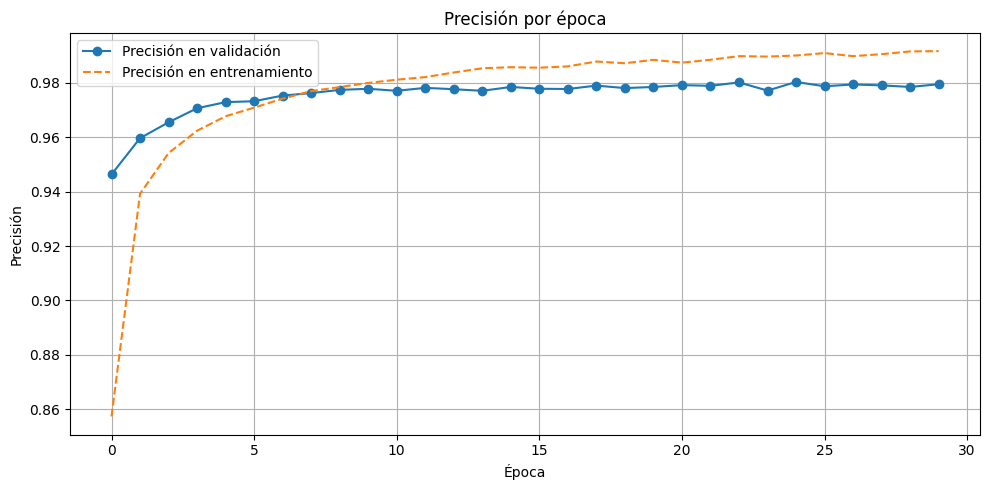

In [67]:
import matplotlib.pyplot as plt

# Gráfica de precisión en validación
plt.figure(figsize=(10, 5))
plt.plot(history_final.history['val_accuracy'], label='Precisión en validación', marker='o')
plt.plot(history_final.history['accuracy'], label='Precisión en entrenamiento', linestyle='--')
plt.title('Precisión por época')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
